## Introduction

Data obtain from Stanford Open Policing Project dataset at
 https://openpolicing.stanford.edu/
 
The dataset contains trafffic stops by police officers in US states. This project will focus on the state of Rhode Island

## Preparing the data

In [2]:
import pandas as pd

ri = pd.read_csv('C:/data/police.csv')

ri.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


We can see that each row represent one traffic stop and there are many missing values indicating by NaN

#### Deal with missing values

In [3]:
ri.isnull()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91737,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91738,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
91739,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False


In [4]:
ri.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

Among 91,741 records, all the country_name is missing. The next serious missing variable is search_type while other variables like driver_gender, driver race, ... missing about 6% of the dataset. Let's drop the the column with no information

In [5]:
# Dropping county_name column and state column as we just look at Rhode Island
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame
print(ri.shape)

(91741, 13)


The driver_gender column will be critical to many analyses later and because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

In [6]:
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
ri.isnull().sum()

# Examine the shape of the DataFrame
print(ri.shape)

(86536, 13)


#### Examing the data types

In [7]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

Besides search_conductd and drugs_related_stop are Boolean types, the rest are string objects which is incorect for datetime variables such as stop_date, stop_time; or category variables such as driver_gender, driver_race; or boolean variables such as is_arrested

#### Fixing data types

In [8]:
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' (again)
print(ri.is_arrested.dtype)

bool


In [9]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Check the data type of 'stop_datetime'
print(ri.stop_datetime.dtype)

datetime64[ns]


#### Setting the index to stop_datetime column

In [10]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


## Exploring the dataset - EDA

#### What  type of violations are being committed by all drivers?

In [11]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64
Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


We can see that the most common type of viloation is 'Speeding', next is 'Moving violation' and 'Equipment'

#### What are the outcomes of these police stops?

In [12]:
# Count the unique values in 'stop_outcome'
print(ri.stop_outcome.value_counts())

# Express the counts as proportions
print(ri.stop_outcome.value_counts(normalize=True))

Citation            77091
Warning              5136
Arrest Driver        2735
No Action             624
N/D                   607
Arrest Passenger      343
Name: stop_outcome, dtype: int64
Citation            0.890855
Warning             0.059351
Arrest Driver       0.031605
No Action           0.007211
N/D                 0.007014
Arrest Passenger    0.003964
Name: stop_outcome, dtype: float64


Amost 90% of all police stops resulted in a citation while only 3% of the stop will lead to an arrest of the driver

#### Is there discrimiation by race in a police stop

In [13]:
# Stop outcomes for White group
ri[ri.driver_race=='White'].stop_outcome.value_counts(normalize=True)

Citation            0.902263
Warning             0.057508
Arrest Driver       0.024018
No Action           0.007031
N/D                 0.006433
Arrest Passenger    0.002748
Name: stop_outcome, dtype: float64

In [14]:
# Stop outcomes for Asian group
ri[ri.driver_race=='Asian'].stop_outcome.value_counts(normalize=True)

Citation            0.922980
Warning             0.045207
Arrest Driver       0.017581
No Action           0.008372
N/D                 0.004186
Arrest Passenger    0.001674
Name: stop_outcome, dtype: float64

We can see that there is no major differences in a police stop that target toward a race

#### Whether male and female drivers tend to commit different types of traffic violations.

In [15]:
# Compute the violations by female drivers (as proportions)
ri[ri.driver_gender=='F'].violation.value_counts(normalize=True)

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

In [16]:
# Compute the violations by male drivers (as proportions)
ri[ri.driver_gender=='M'].violation.value_counts(normalize=True)

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

It is supprising that female drivers in RI tend to drive faster and violate more speeding ticket than male counterpart. While male drivers in RI tend to be more careless and have more moving violation compared to female counterpart

#### Whether a police will search a car or arrest the driver depending on the gender of the driver?

In [17]:
# Compute search conducted rate between two groups
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64

In [18]:
# Compute arrest rate between two groups
ri.groupby('driver_gender').is_arrested.mean()

driver_gender
F    0.028140
M    0.038383
Name: is_arrested, dtype: float64

We can see that police in RI tend to search more in a car drove by a male driver and arrest more male drivers

#### Let's check the frequency table between race and gender

In [23]:
# Compute percentage across rows
pd.crosstab(ri.driver_race, ri.driver_gender).apply(lambda r: r/r.sum(), axis=1)

driver_gender,F,M
driver_race,,
Asian,0.230640,0.769360
Black,0.218234,0.781766
Hispanic,0.200781,0.799219
Other,0.200000,0.800000
White,0.299596,0.700404


We can see that the percentage of women among races are comparable around 20% with white a litte bit more of 30%

In [24]:
# Compute percentage across columns
pd.crosstab(ri.driver_race, ri.driver_gender).apply(lambda c: c/c.sum(), axis=0)

driver_gender,F,M
driver_race,,
Asian,0.023177,0.029285
Black,0.112770,0.153023
Hispanic,0.082149,0.123865
Other,0.002229,0.003378
White,0.779675,0.690450


This table is only usefull if we compare to the demographics of RI

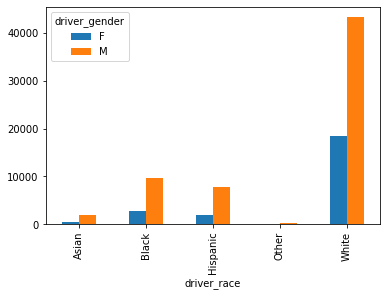

In [25]:
table = pd.crosstab(ri.driver_race, ri.driver_gender)
table.plot(kind='bar')

#### Some other visualization of police work in RI

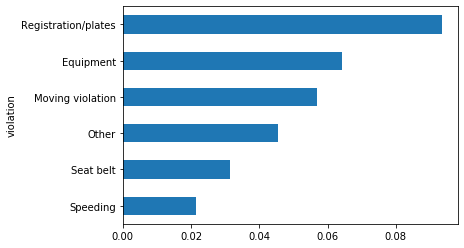

In [31]:
# Visualize how often searches were performed after each type of violation
search_rate = ri.groupby('violation').search_conducted.mean()

search_rate.sort_values().plot(kind='barh')

We can see that the type of violation like Registration/plates will lead to the police will search your car for further violation. This is understandable as plates/registration will show a person history of crime or other kind of misdemeanour